<a href="https://colab.research.google.com/github/Kaining5127/Brain-Stroke-Prediction/blob/main/Artery_Plumber_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WQD7003 Data Analytics OCC1**
# **Lecturer: Dr. Saw Shier Nee**

# **Brain Stroke Prediction using Machine Learning**

# Group Artery Plumber


| No. | Matric Number | Name | Task |
|-----|---------------|----------------------------------------------------------------------|------------------------------------------------------------------|  
| 1   | 23094470/1 | CHUA SZE YAN    | Exploratory Data Analysis, Feature Engineering, Modelling          |  
| 2   | 22091346/1 | TEO KAI NING    | Exploratory Data Analysis, Feature Engineering, Modelling          |  
| 3   | 17207012/2 | TAN JIAN LIN    | Modelling, Evaluation & Interpretation, Deployment          |
| 4   | 23101857/1 | VETRI A/L THANABALAN| Data Preprocessing, Exploratory Data Analysis, Deployment          |  
| 5   | 22106713/1 | LI YUE XIN     | Business Understanding, Data Understanding          |  

## **Table of contents:**
- [1.0 CRISP-DM](#10-crisp-dm)
- [2.0 Data Understanding](#20-data-understanding)
- [3.0 Data Pre-processing](#30-data-pre-processing)
- [4.0 Exploratory Data Analysis (EDA)](#40-exploratory-data-analysis)
- [5.0 Transformation and Label Encoding](#50-transformation-and-label-encoding)
- [6.0 Machine Learning Modeling](#60-machine-learning-modeling)
- [7.0 Deployment](#70-deployment)

# 1.0 CRISP-DM

##Business Understanding

###Research Background

Stroke is a sudden neurological disease that interrupts the blood supply to the brain, leading to neurological deficits which affect the patient's motor and cognitive functions. Mostly, Brain stroke occurs when blood flow in the brain is blocked or interrupted, preventing the brain tissue from receiving oxygen. The lack of oxygen can cause damage in brain cells and tissue, which will lead to severe symptoms, common symptoms include sudden weakness in limbs, face drooping, paralysis or slurred speech, however, some patients may present with less typical stroke symptoms include dizziness, vision problems or cognitive impairment (Andersson et al,. 2024). However, 80% of strokes can be prevented. Early identification of stroke risk allows for timely treatment and prevention. Sirsat (2020) emphasized the importance of early identification and timely treatment to reduce stroke-related mortality. Machine learning offers promising solutions to address the complexity and interplay of brain stroke risk factors, emphasizing the need for advanced data processing, analysis, and fusion techniques for a comprehensive health assessment (Fernandes et al., 2024). The accuracy of machine learning output depends on the quality of input data and the applicability of the algorithm used(Mainali et al., 2021).

###Situation Assessment

Assessing a stroke involves identifying risk factors like symptom severity and the patient’s medical condition to guide quick treatment and prevent future strokes. Chaki(2024), mentioned early identification of strokes is vital as it can lead to timely interventions, such as mechanical thrombectomy, which can significantly improve patient outcomes. Since timely treatment is crucial, healthcare providers must act fast to minimize damage and address potential long-term disabilities. Delays in recognizing symptoms or accessing care, especially in rural areas, often result in patients missing the critical window for effective treatment. By using machine learning to predict stroke in medical emergencies, it is possible to quickly and accurately identify whether a patient is experiencing a stroke (Wenstrup et al., 2023).

###Objectives

To develop a predictive model that predicts a patient’s risk of experiencing a brain stroke based on key factors.

###Data Mining Goals

1. To identify main brain stroke factors based on patient’s health condition and lifestyle habits
2. To build machine learning models in improving decision-making in healthcare providers
3. To evaluate and verify the efficacy of different machine learning model, identifying the most accurate model for brain stroke prediction



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.0 Data Understanding

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Import dataset
#  Load the dataset
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df = pd.DataFrame(df)

In [ ]:
#  Preview the dataset
# Display first few rows
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Describe Data

In [ ]:
print(f"Rows: {df.shape[0]:,}")
print(f"Cols: {df.shape[1]:,}")

Rows: 5,110
Cols: 12


In [ ]:
#Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Summary statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# 3.0 Data Pre-processing

Identify NA values

Findings:
1. 201 NA records in BMI column
2. 1544 NA records (labelled as "Unknown") in smoking_status column

In [ ]:
for i in df.columns :
    print("Total NA in {} is {}".format(i,df[i].isna().sum()))

Total NA in id is 0
Total NA in gender is 0
Total NA in age is 0
Total NA in hypertension is 0
Total NA in heart_disease is 0
Total NA in ever_married is 0
Total NA in work_type is 0
Total NA in Residence_type is 0
Total NA in avg_glucose_level is 0
Total NA in bmi is 201
Total NA in smoking_status is 0
Total NA in stroke is 0


Smoking Status: Replacing all the "Unknown" with NA

The "Unknown" status may result from respondents refused to disclose their smoking habits, causing the data to be missing not at random (MNAR), which could introduce bias. Therefore, the smoking_status column will be dropped.

In [ ]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [ ]:
stroke_rep = df['smoking_status'].replace('Unknown',np.nan)

df['smoking_status'] = stroke_rep

In [ ]:
# Dropping the smoking status column
storke = df.drop('smoking_status',axis=1,inplace =True)

df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


BMI: Hot-deck Imputation

Replacing NAs with median as the BMI distribution is right-skewed.

In [ ]:
# Creating the male data
stroke_male = df[df['gender'] == 'Male']

# Creating the female data
stroke_female = df[df['gender'] == 'Female']

In [ ]:
stroke_female.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,97


In [ ]:
stroke_male.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,104


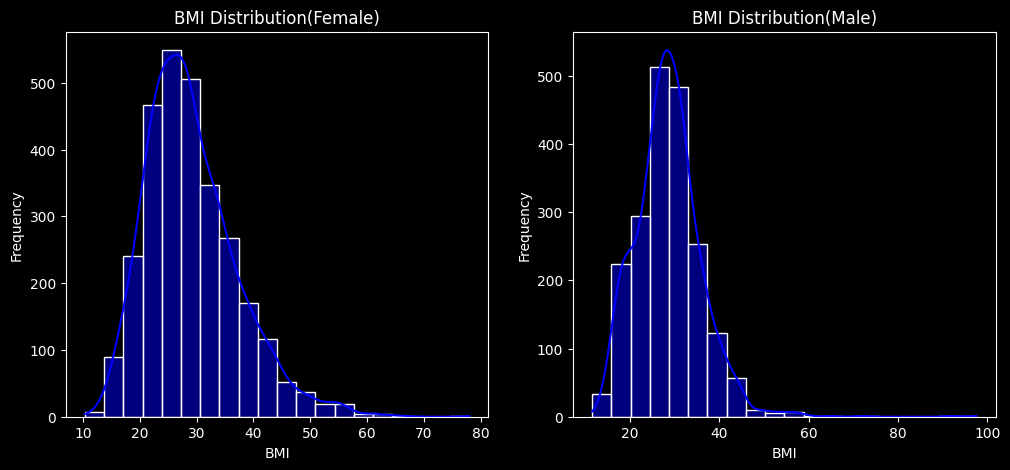

In [ ]:
#Check distribution of BMI for Male and Female

plt.style.use('dark_background')
fig, axes = plt.subplots(1,2, figsize=(12, 5))

stroke_female = df[df['gender'] == 'Female']
stroke_male = df[df['gender'] == 'Male']

sns.histplot(stroke_female['bmi'], bins=20, kde=True, color='blue' , ax = axes[0])
axes[0].set_title("BMI Distribution(Female)")
axes[0].set_xlabel("BMI")
axes[0].set_ylabel("Frequency")


sns.histplot(stroke_male['bmi'], bins=20, kde=True, color='blue' , ax = axes[1])
axes[1].set_title("BMI Distribution(Male)")
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Frequency")

plt.show()

In [ ]:
# To replace NULL BMI using median for female

stroke_female['bmi'].fillna(stroke_female['bmi'].median(),inplace=True)

# To replace NULL BMI using median for male

stroke_male['bmi'].fillna(stroke_male['bmi'].median(),inplace=True)

<ipython-input-20-894201c29425>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_female['bmi'].fillna(stroke_female['bmi'].median(),inplace=True)
<ipython-input-20-894201c29425>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_female['bmi'].fillna(stroke_female['bmi'].median(),inplace=True)
<ipython-input-20-894201c29425>:7: Futu

In [ ]:
stroke_female.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
stroke_male.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df = pd.concat([stroke_female,stroke_male])

df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


Covert data type for Age column  to Int

In [ ]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [ ]:
df['age'] = df['age'].astype(int)

df.dtypes

,0
id,int64
gender,object
age,int64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


# 4.0 Exploratory Data Analysis (EDA)

To visualize number of patients in the dataset had a stroke using pie chart and bar chart.

<ipython-input-26-662e7eeb47ff>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, ax=ax[1], palette=['#66b3ff', '#ff9999'])


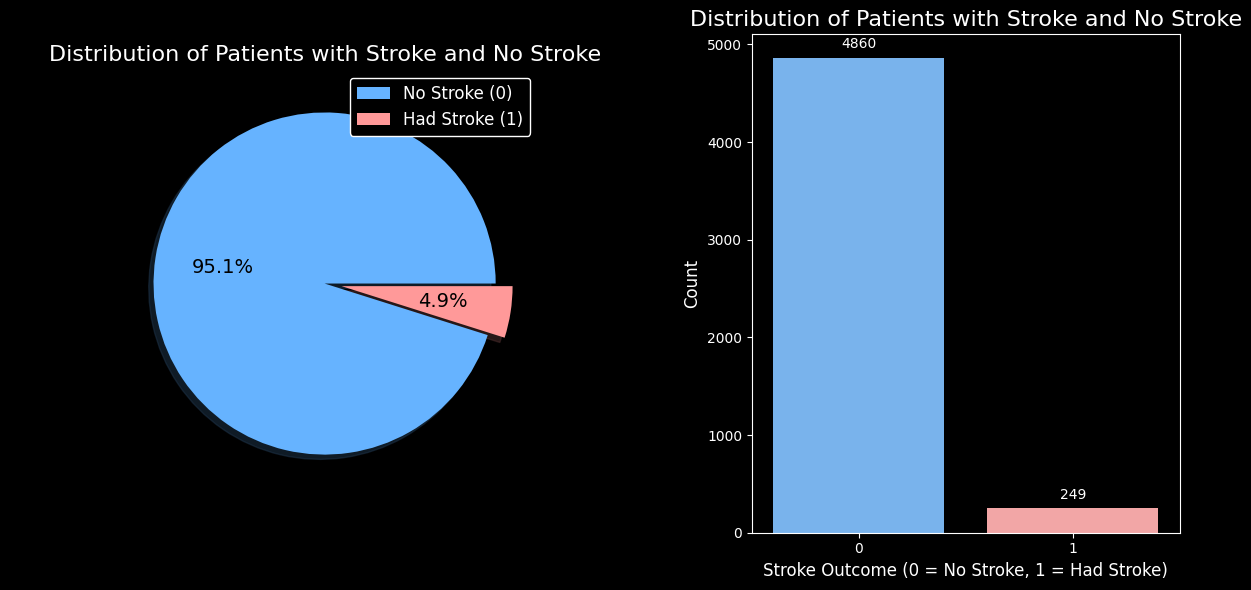

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('dark_background')

labels = ['No Stroke (0)', 'Had Stroke (1)']
df['stroke'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True,
    labels=labels,
    colors=['#66b3ff', '#ff9999'],
    textprops={'fontsize': 14, 'color': 'black'}
)
ax[0].set_title('Distribution of Patients with Stroke and No Stroke', fontsize=16)
ax[0].set_ylabel('')

ax[0].legend(labels=labels, loc='upper right', fontsize=12, facecolor='black', edgecolor='white', framealpha=1, labelcolor='white')

sns.countplot(x='stroke', data=df, ax=ax[1], palette=['#66b3ff', '#ff9999'])
ax[1].set_title('Distribution of Patients with Stroke and No Stroke', fontsize=16)
ax[1].set_xlabel('Stroke Outcome (0 = No Stroke, 1 = Had Stroke)', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='white')

plt.tight_layout()
plt.show()

Correlation Matrix

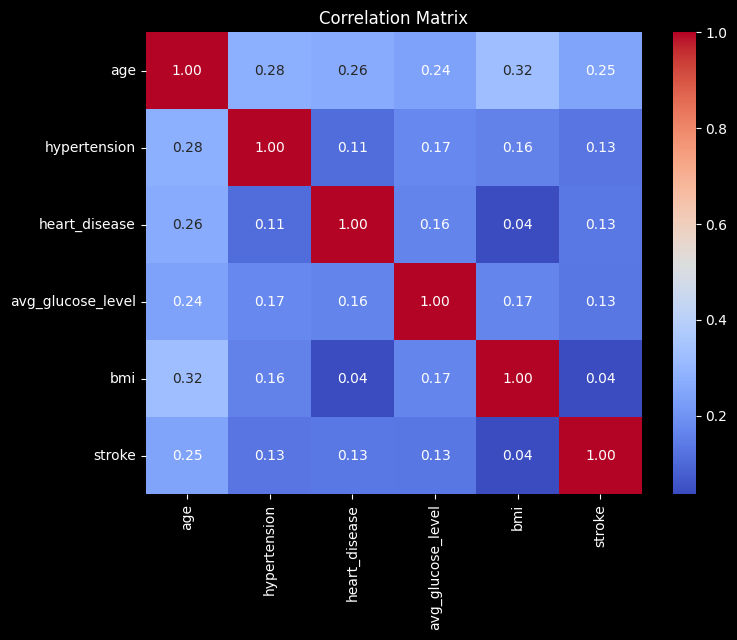

In [ ]:
corr_m = df.drop(columns=['id']).corr(numeric_only = True)

plt.figure(figsize=(8, 6))

sns.heatmap(corr_m, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')

plt.show()

Distribution Plot

Findings:
1. Average Glucose Level and BMI shows a right-skewed distribution, suggesting the need for possible transformations for modeling.
2. Age might have a multimodal distribution, suggesting different age groups dominate the population.

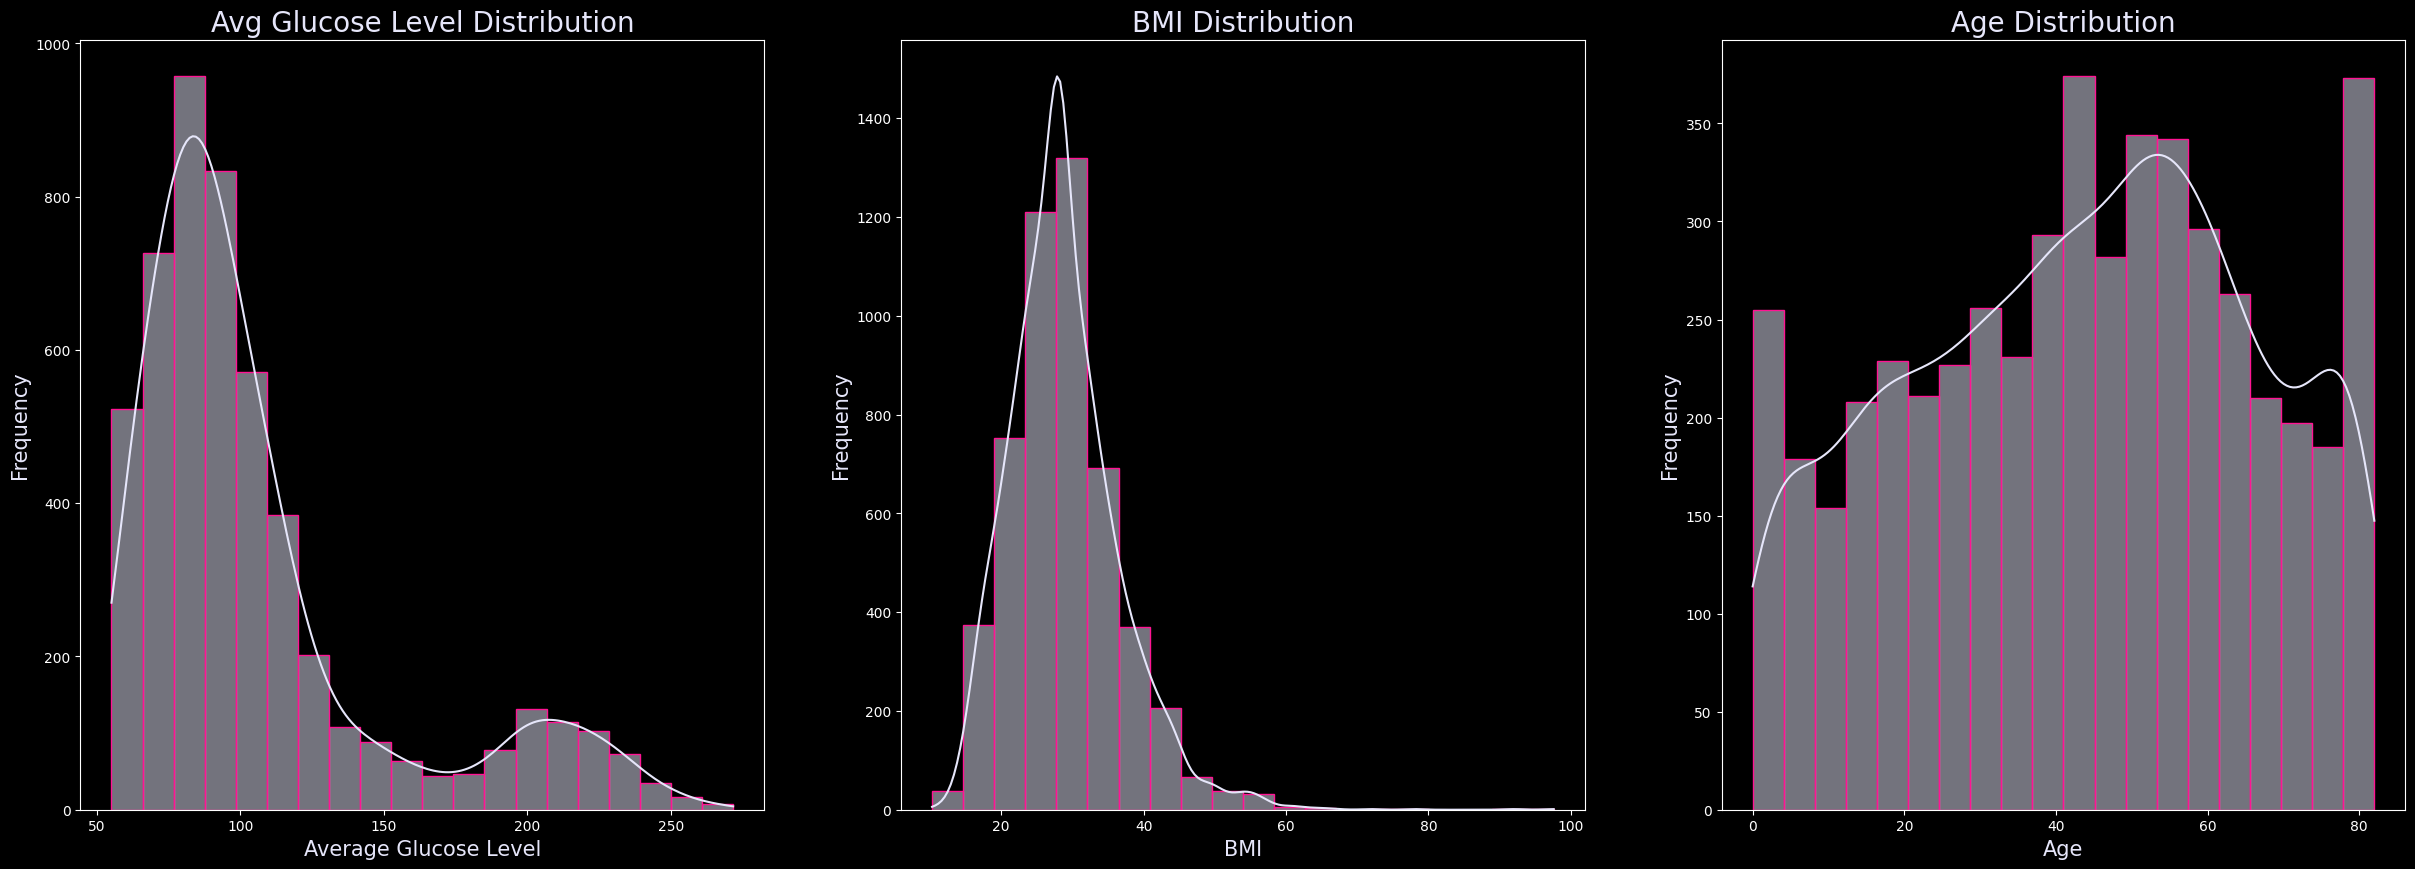

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
fig, axes = plt.subplots(1,3, figsize=(30, 10))

sns.histplot(df['avg_glucose_level'], bins=20, kde=True, color='lavender',
             edgecolor='deeppink', ax = axes[0])

sns.histplot(df['bmi'], bins=20, kde=True, color='lavender',
             edgecolor='deeppink', ax = axes[1])

sns.histplot(df['age'], bins=20, kde=True, color='lavender',
             edgecolor='deeppink', ax = axes[2])

axes[0].set_title("Avg Glucose Level Distribution", fontsize=20, color='lavender')
axes[0].set_xlabel("Average Glucose Level", fontsize=15, color='lavender')
axes[0].set_ylabel("Frequency", fontsize=15, color='lavender')

axes[1].set_title("BMI Distribution", fontsize=20, color='lavender')
axes[1].set_xlabel("BMI", fontsize=15, color='lavender')
axes[1].set_ylabel("Frequency", fontsize=15, color='lavender')

axes[2].set_title("Age Distribution", fontsize=20, color='lavender')
axes[2].set_xlabel("Age", fontsize=15, color='lavender')
axes[2].set_ylabel("Frequency", fontsize=15, color='lavender')

plt.show()

Box Plot

Findings:
1. Higher trend of glucose level for stroke cases

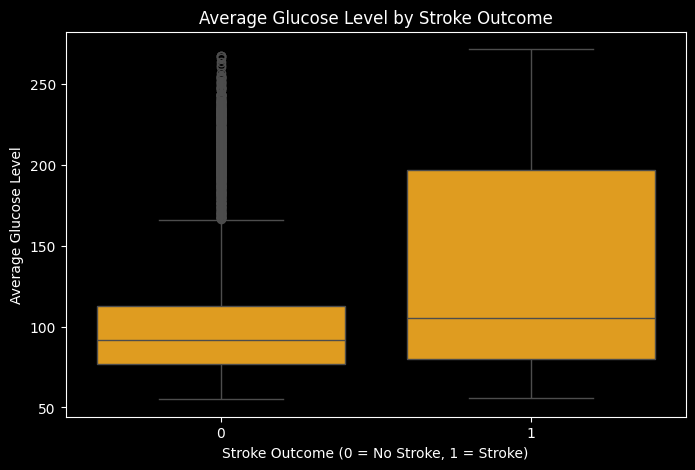

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, color='orange')
plt.title("Average Glucose Level by Stroke Outcome")
plt.xlabel("Stroke Outcome (0 = No Stroke, 1 = Stroke)")
plt.ylabel("Average Glucose Level")
plt.show()

BMI Distribution by Stroke Outcome

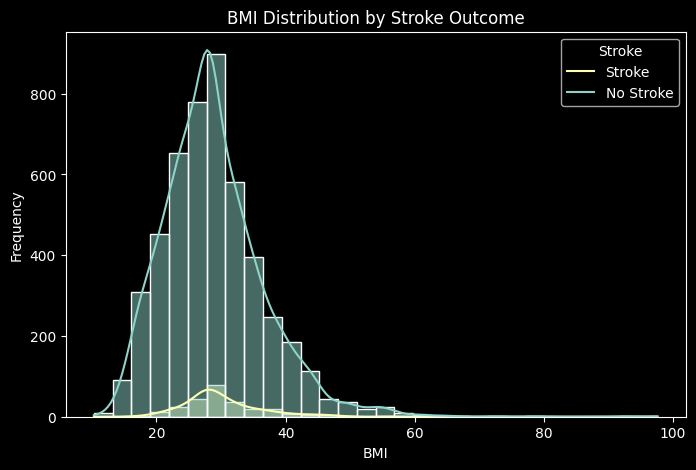

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, bins=30)
plt.title("BMI Distribution by Stroke Outcome")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend(title='Stroke', labels=['Stroke', 'No Stroke'])
plt.show()

Bar Chart for Categorical Data

<ipython-input-31-2884105e5441>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['No Stroke', 'Stroke'])
<ipython-input-31-2884105e5441>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['No Stroke', 'Stroke'])
<ipython-input-31-2884105e5441>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['No Stroke', 'Stroke'])
<ipython-input-31-2884105e5441>:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['No Stroke', 'Stroke'])


[Text(0, 0, 'No Stroke'), Text(1, 0, 'Stroke')]

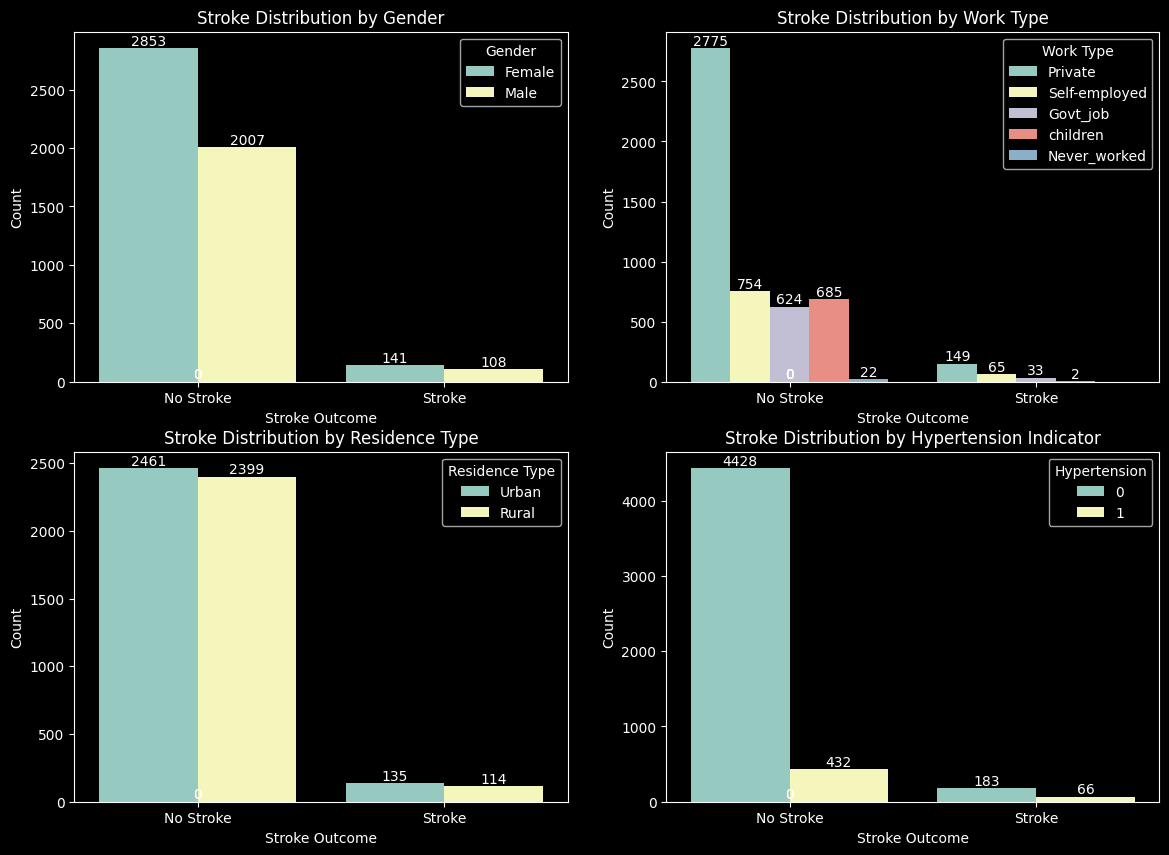

In [ ]:
def perc(ax):
    for p in ax.patches:
       ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax = sns.countplot(data=df, x='stroke', hue= 'gender' ,ax=axes[0, 0])

perc(ax)

axes[0, 0].set_title("Stroke Distribution by Gender")
axes[0, 0].set_xlabel("Stroke Outcome")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title='Gender')
axes[0, 0].set_xticklabels(['No Stroke', 'Stroke'])


ax1 = sns.countplot(data=df, x='stroke', hue= 'work_type' , ax=axes[0, 1])

perc(ax1)

axes[0, 1].set_title("Stroke Distribution by Work Type")
axes[0, 1].set_xlabel("Stroke Outcome")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title='Work Type')
axes[0, 1].set_xticklabels(['No Stroke', 'Stroke'])


ax2 = sns.countplot(data=df, x='stroke', hue= 'Residence_type' , ax=axes[1, 0])

perc(ax2)

axes[1, 0].set_title("Stroke Distribution by Residence Type")
axes[1, 0].set_xlabel("Stroke Outcome")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title='Residence Type')
axes[1, 0].set_xticklabels(['No Stroke', 'Stroke'])


ax3 = sns.countplot(data=df, x='stroke', hue= 'hypertension' , ax=axes[1, 1])

perc(ax3)

axes[1, 1].set_title("Stroke Distribution by Hypertension Indicator")
axes[1, 1].set_xlabel("Stroke Outcome")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title='Hypertension')
axes[1, 1].set_xticklabels(['No Stroke', 'Stroke'])


Interactive Bar Plot for Work Type Distributon

Findings:
1. Higher stroke cases in Private work type compared to others.
2. Work type may be associated with lifestyle or stress-related factors contributing to stroke risk.

In [ ]:
import plotly.express as px

fig = px.histogram(df,
                   x='work_type',
                   barmode='group',
                   color='stroke',
                   text_auto=True,
                   labels={
                       'work_type': 'Work Type',
                       'count': 'No. of People'
                   },
                   template='plotly_dark')

fig.update_layout(
    title="Work Type Distribution by Stroke Outcome",
    yaxis_title="Count of Patients",
    legend=dict(yanchor="top", y=0.99, xanchor='right', x=0.99),
    font_color='lavender',
    legend_title_font_color="deeppink",
    yaxis=dict(tickfont=dict(size=15), titlefont=dict(size=20)),
    xaxis=dict(tickfont=dict(size=15), titlefont=dict(size=20)),
    legend_font_size=15
)

newnames = {'0': 'No', '1': 'Yes'}
fig.for_each_trace(lambda t: t.update(name=newnames[t.name],
                                      legendgroup=newnames[t.name],
                                      hovertemplate=t.hovertemplate.replace(
                                          t.name, newnames[t.name])))

fig.show()

Interactive Box Plot for Age Distribution by Stroke and Gender

Findings:
1. Patients who experienced stroke tend to be older than those who did not for both gender.
2. The age range for patients who experienced stroke is narrower, with the majority of the cases concentrated in older age groups.
3. Two outliers in the stroke case suggesting that could represent extreme cases of very young patients with strokes.

In [ ]:
import plotly.express as px

fig = px.box(df,
             x='stroke',
             y='age',
             color='gender',
             template='plotly_dark',
             labels={'age': 'Age of the People', 'stroke': 'Stroke Outcome'},
             color_discrete_sequence=px.colors.qualitative.Alphabet)

fig.update_layout(
    title="Age Distribution by Stroke and Gender",
    legend=dict(yanchor="top", y=0.25, xanchor='right', x=0.55),
    font_color='lavender',
    legend_title_font_color="deeppink",
    legend_title_font_size=15,
    yaxis=dict(tickfont=dict(size=15), titlefont=dict(size=20)),
    xaxis=dict(
        title="Stroke Outcome",
        tickvals=[0, 1],
        ticktext=['0: No Stroke', '1: Had Stroke']
    ),
    legend_font_size=14
)

fig.for_each_trace(lambda t: t.update(name=newnames.get(t.name, t.name),
                                      legendgroup=newnames.get(t.name, t.name),
                                      hovertemplate=t.hovertemplate.replace(
                                          t.name, newnames.get(t.name, t.name))))

fig.update_layout(legend=dict(font=dict(size=12), orientation="v"))

fig.show()


Identify Outlier before Transformation using Interquatile Range (IQR) method

In [ ]:
list_out = []

for x in ['bmi','avg_glucose_level','age']:
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)

  # Calculate IQR
  IQR = Q3 - Q1

  # Define outlier boundaries
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = df[(df[x] < lower_bound) | (df[x] > upper_bound)]
  list_out.append(outliers[x].count())

print(list_out)

[126, 627, 0]


              factor  count
0                bmi    126
1  avg_glucose_level    627
2                age      0


Text(0.5, 1.0, 'Outlier')

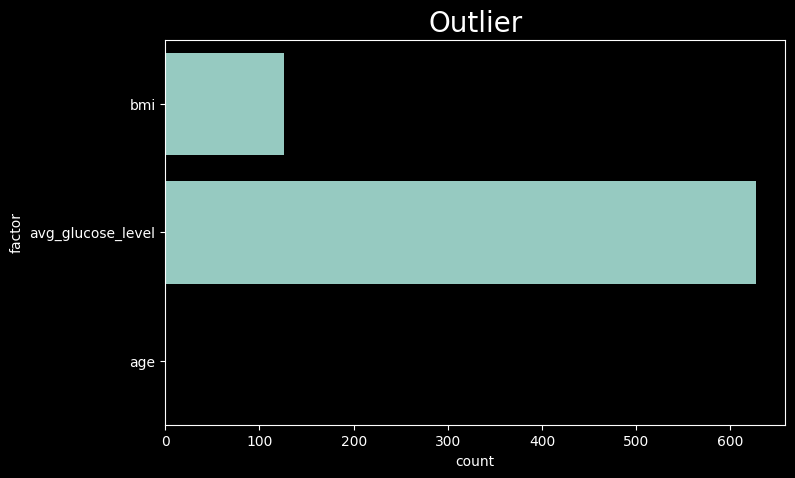

In [ ]:
plt.figure(figsize=(8, 5))

out_data = data = {
    'factor':['bmi','avg_glucose_level','age'] ,
    'count': list_out
}
out_data = pd.DataFrame(out_data)
print(out_data)

sns.barplot(x ='count', y ='factor', data = out_data)

plt.title("Outlier",size =20)

# 5.0 Transformation and Label Encoding

## Log Transformation for Average Glucose Level and BMI

Findings:

1. Both distribution is normally distributed after the transformation.

In [ ]:
# Log transformation

df_new = df

df_new['avg_glucose_level'] = np.log(df_new['avg_glucose_level'] + 1)

df_new['bmi'] = np.log(df_new['bmi'] + 1)

Text(0, 0.5, 'Frequency')

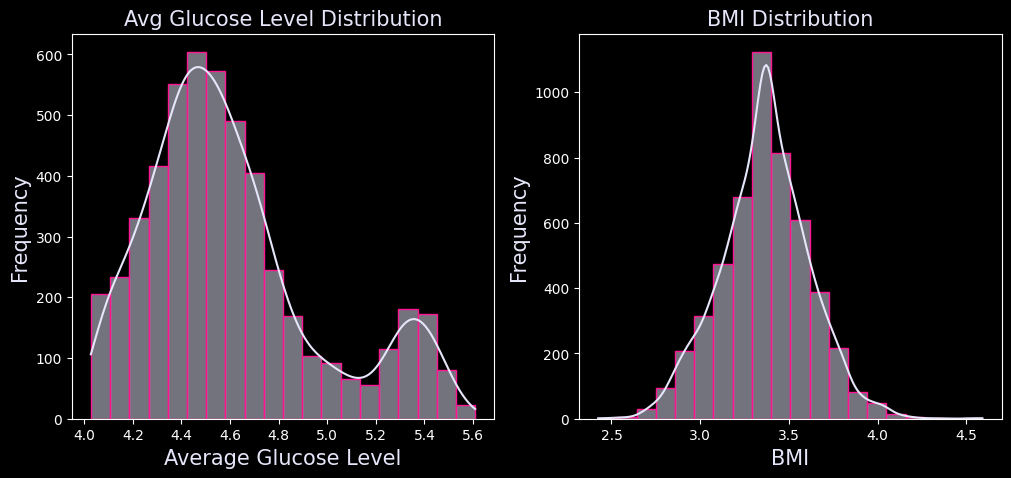

In [ ]:
plt.style.use('dark_background')
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.histplot(df['avg_glucose_level'], bins=20, kde=True, color='lavender',
             edgecolor='deeppink', ax = axes[0])

sns.histplot(df['bmi'], bins=20, kde=True, color='lavender',
             edgecolor='deeppink', ax = axes[1])

axes[0].set_title("Avg Glucose Level Distribution", fontsize=15, color='lavender')
axes[0].set_xlabel("Average Glucose Level", fontsize=15, color='lavender')
axes[0].set_ylabel("Frequency", fontsize=15, color='lavender')

axes[1].set_title("BMI Distribution", fontsize=15, color='lavender')
axes[1].set_xlabel("BMI", fontsize=15, color='lavender')
axes[1].set_ylabel("Frequency", fontsize=15, color='lavender')

Interquatile Range (IQR) after Log Transformation

Findings:
1. Count of outliers significantly reduced.

In [ ]:
# Find outlier after transformation
## Interquartile range (IQR) method

list_out = []

for x in ['bmi','avg_glucose_level','age']:
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)

  # Calculate IQR
  IQR = Q3 - Q1

  # Define outlier boundaries
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = df[(df[x] < lower_bound) | (df[x] > upper_bound)]
  list_out.append(outliers[x].count())

print(list_out)

[88, 384, 0]


              factor  count
0                bmi     88
1  avg_glucose_level    384
2                age      0


Text(0.5, 1.0, 'Outlier')

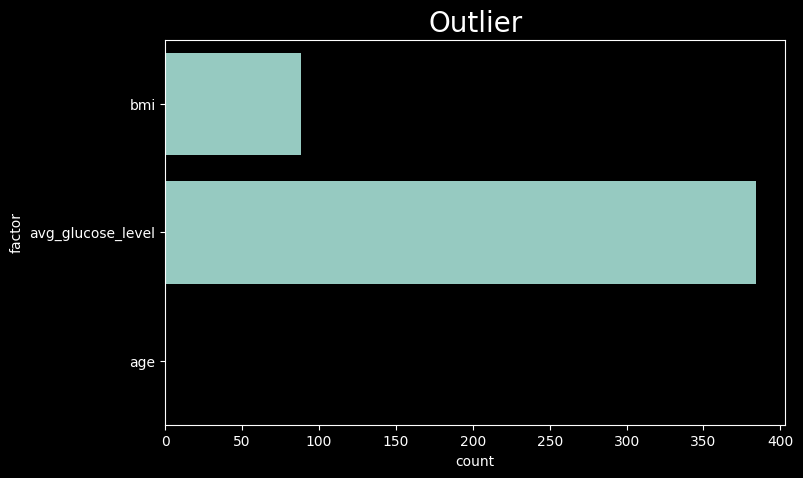

In [ ]:
plt.figure(figsize=(8, 5))

out_data = data = {
    'factor':['bmi','avg_glucose_level','age'] ,
    'count': list_out
}
out_data = pd.DataFrame(out_data)
print(out_data)

sns.barplot(x ='count', y ='factor', data = out_data)

plt.title("Outlier",size =20)

## Encoding Categorical Data:

1. Gender
- 0: Female, 1: Male

2. Residence_type
- 0: Rural, 1: Urban

3. ever_married
- 0: No, 1: Yes

4. work_type
- 1: Children, 2: Never_worked, 3: Self_employed, 4: Govt_job, 5: Private



In [ ]:
# Gender

print(df['gender'].unique())
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})
print(df['gender'].unique())

['Female' 'Male']
[0 1]


<ipython-input-40-fbd8905572a2>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
#Residence_type

print(df['Residence_type'].unique())
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})
print(df['Residence_type'].unique())



['Rural' 'Urban']
[0 1]


<ipython-input-41-44f65434314d>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df['ever_married'].unique()

df.loc[:, 'ever_married'].tail()

,ever_married
5097,Yes
5098,No
5099,Yes
5100,Yes
5108,Yes


In [ ]:
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
df['ever_married'].unique()

df.loc[:,'ever_married'].tail()

<ipython-input-43-a852063d9817>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,ever_married
5097,1
5098,0
5099,1
5100,1
5108,1


In [ ]:
print(df['work_type'].unique())
df['work_type'] = df['work_type'].replace({'Private':5, 'Govt_job':4, 'Self-employed':3, 'Never_worked':2,'children':1})
print(df['work_type'].unique())

['Self-employed' 'Private' 'Govt_job' 'children' 'Never_worked']
[3 5 4 1 2]


<ipython-input-44-783cf6ab0264>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
1,51676,0,61,0,0,1,3,0,5.314240,3.360375,1
3,60182,0,49,0,0,1,5,1,5.148831,3.566712,1
4,1665,0,79,1,0,1,3,0,5.165471,3.218876,1
7,10434,0,69,0,0,0,5,1,4.557974,3.169686,1
8,27419,0,59,0,0,1,5,0,4.345752,3.360375,1


# 6.0 Machine Learning Modeling

## Feature Selection
1. Chi-square Independence Test
2. Correlation Matrix

Chi-square Independence Test - A statistical test to determine whether there is a significant association between two categorical variable.

Findings:
1. From the result of chi-square independence test, the feature 'heart_disease', 'hypertension' and 'ever_married', 'work_type' are important features that affect stroke at 5% significant level

In [ ]:
# H0: The two categorical variable are independent
# H1: The two categorical variable are dependent

from sklearn.feature_selection import chi2

a =  df.drop(columns = ['id','age','bmi','stroke'], axis = 1)
b = df['stroke']

chi_scores = chi2(a,b)

gender               6.192826e-01
hypertension         3.808401e-18
heart_disease        6.688296e-21
ever_married         5.672425e-06
work_type            1.127534e-02
Residence_type       4.396819e-01
avg_glucose_level    1.612291e-01
dtype: float64


<Axes: >

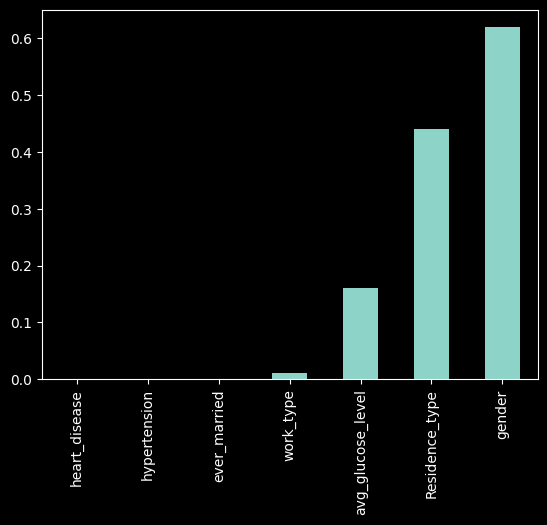

In [ ]:
chi_values = pd.Series(chi_scores[1],index = a.columns)
print(chi_values)
chi_values.sort_values(ascending = True, inplace = True)
chi_values.plot.bar()

Correlation Matrix - A statistical test to evaluate the relationship between numerical variables.

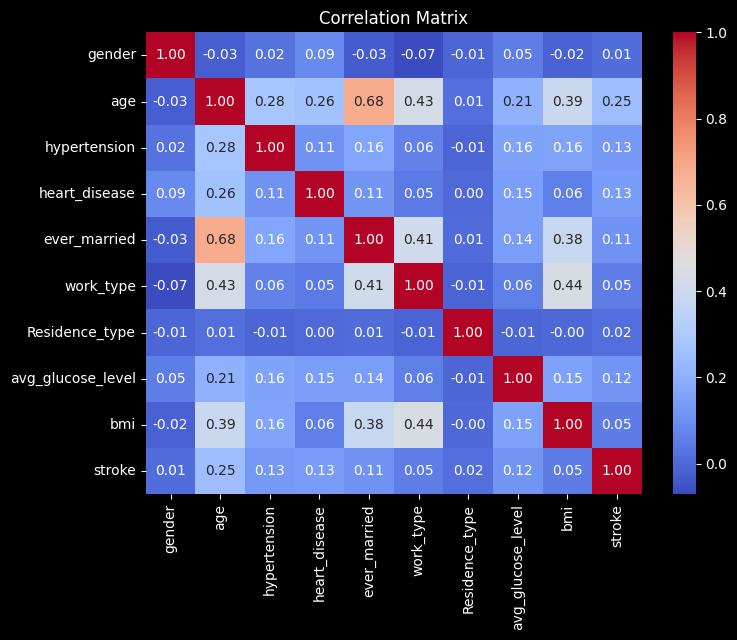

In [ ]:
#Correlation Matrix

corr_m = df.drop(columns=['id']).corr(numeric_only = True)

plt.figure(figsize=(8, 6))

sns.heatmap(corr_m, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')

plt.show()

## Modelling

Splitting 80% train data and 20% test data

In [ ]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop(columns=['stroke','id'])
y = df['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###Model Function
1. Random Forest
2. Gradient Boost
3. Logistic Regression
4. SVM

Recursive feature elimination with cross-validation (RFECV) is applied to eliminate the unimportant features which mitigates the risk of overfitting.

In [ ]:
def model_treebased(model,name):
  from sklearn.feature_selection import RFECV
  from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
  from sklearn.model_selection import StratifiedKFold
  import numpy as np
  # Perform Recursive Feature Elimination with Cross-Validation (RFECV)
  # Use StratifiedKFold for maintaining class balance
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Define RFECV object
  rfecv = RFECV(
      estimator = model,
      step=1,  # Number of features to remove per iteration
      cv=cv,
      scoring='roc_auc',  # Optimize for AUC-ROC
      verbose=1
  )

  # Fit RFECV on the training data
  rfecv.fit(X_train, y_train)

  # Get the Optimal Number of Features
  optimal_features = rfecv.support_  # Boolean mask for selected features
  selected_features = X_train.columns[optimal_features]
  print("\nOptimal Features Selected:")
  print(selected_features)

  print(f"\nOptimal Number of Features: {rfecv.n_features_}")

  # Reduce Dataset to Optimal Features
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  # Train the Final Model
  final_model = model
  final_model.fit(X_train_selected, y_train)

  # Make Predictions
  y_pred = final_model.predict(X_test_selected)
  y_proba = final_model.predict_proba(X_test_selected)[:, 1]

  # Evaluate the Model
  # Classification Report
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

  # AUC-ROC Score
  roc_auc = roc_auc_score(y_test, y_proba)
  print(f"\nAUC-ROC: {roc_auc:.2f}")

  # Accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")

  # Plot RFECV Scores
  plt.figure(figsize=(10, 6))
  plt.xlabel("Number of Features Selected")
  plt.ylabel("Cross-Validation Score (AUC-ROC)")
  plt.title("RFECV - " + name)
  plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker = 'o')
  plt.show()

  # Visualize Feature Ranking
  plt.figure(figsize=(10, 6))
  plt.barh(selected_features, rfecv.estimator_.feature_importances_)
  plt.title("Feature Importance - " + name)
  plt.xlabel("Importance")
  plt.ylabel("Feature")
  plt.show()


In [ ]:
# Model other than tree-based

def model(model,name):
  from sklearn.feature_selection import RFECV
  from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
  from sklearn.model_selection import StratifiedKFold
  import numpy as np
# Perform Recursive Feature Elimination with Cross-Validation (RFECV)
# Use StratifiedKFold to maintain class balance across folds
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Define RFECV object
  rfecv = RFECV(
      estimator = model,
      step=1,  # Remove one feature at a time
      cv=cv,
      scoring='roc_auc',  # Optimize for AUC-ROC
      verbose=1
  )

  # Fit RFECV on the training data
  rfecv.fit(X_train, y_train)

  # Get the Optimal Features
  optimal_features = rfecv.support_  # Boolean mask for selected features
  selected_features = X_train.columns[optimal_features]
  print("\nOptimal Features Selected:")
  print(selected_features)

  print(f"\nOptimal Number of Features: {rfecv.n_features_}")

  # Reduce Dataset to Optimal Features
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  # Train the Final Model
  final_model = model
  final_model.fit(X_train_selected, y_train)

  # Make Predictions
  y_pred = final_model.predict(X_test_selected)
  y_proba = final_model.predict_proba(X_test_selected)[:, 1]

  # Evaluate the Model
  # Classification Report
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

  # AUC-ROC Score
  roc_auc = roc_auc_score(y_test, y_proba)
  print(f"\nAUC-ROC: {roc_auc:.2f}")

  # Accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")

  # Plot RFECV Scores
  plt.figure(figsize=(10, 6))
  plt.xlabel("Number of Features Selected")
  plt.ylabel("Cross-Validation Score (AUC-ROC)")
  plt.title("RFECV - " + name)
  plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker = 'o')
  plt.show()

  feature_importances = np.abs(final_model.coef_[0])
  feature_importance_df = pd.DataFrame({
      'Feature': selected_features,
      'Importance': feature_importances
  }).sort_values(by='Importance', ascending=False)

  plt.figure(figsize=(10, 6))
  plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
  plt.title("Feature Importance - " + name)
  plt.xlabel("Importance (coeff)")
  plt.ylabel("Feature")
  plt.gca().invert_yaxis()
  plt.show()

1. RFECV with Random Forest

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator wi

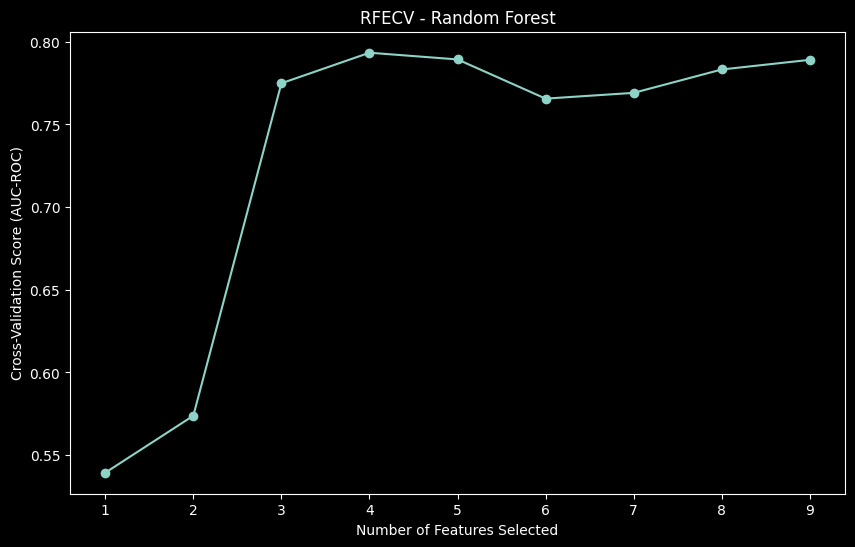

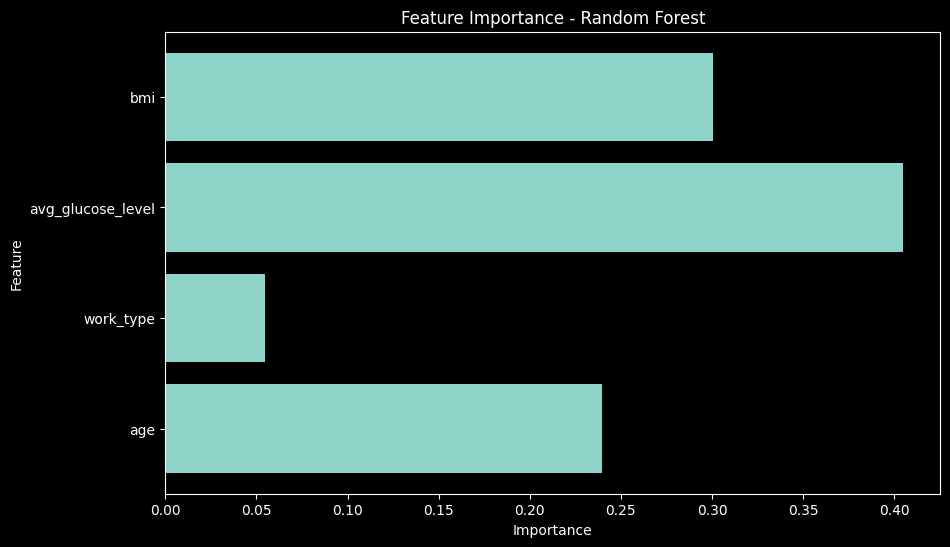

In [ ]:
from sklearn.ensemble import RandomForestClassifier

base_rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

model_treebased(base_rf_model,'Random Forest')

2. RFECV with Gradient Boost

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator wi

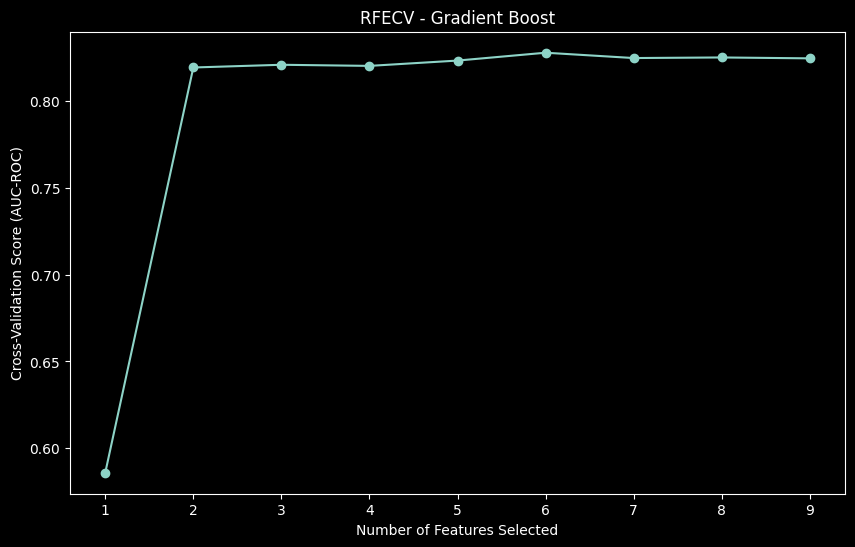

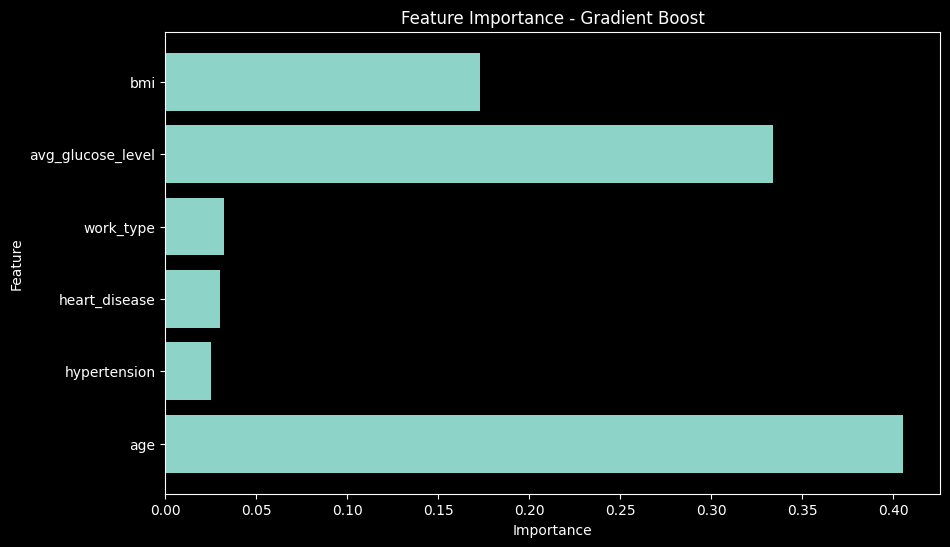

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

base_gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)

model_treebased(base_gb_model,'Gradient Boost')

3. RFECV with Logistic Regression

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator wi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



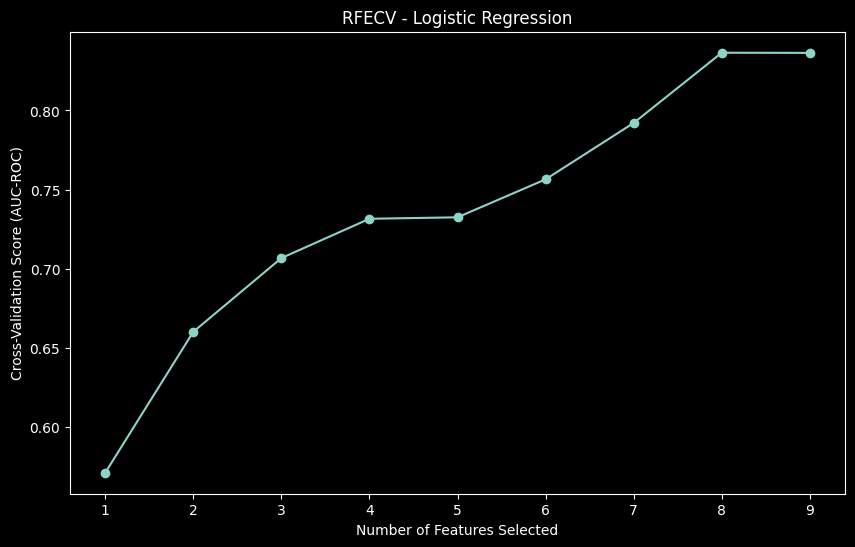

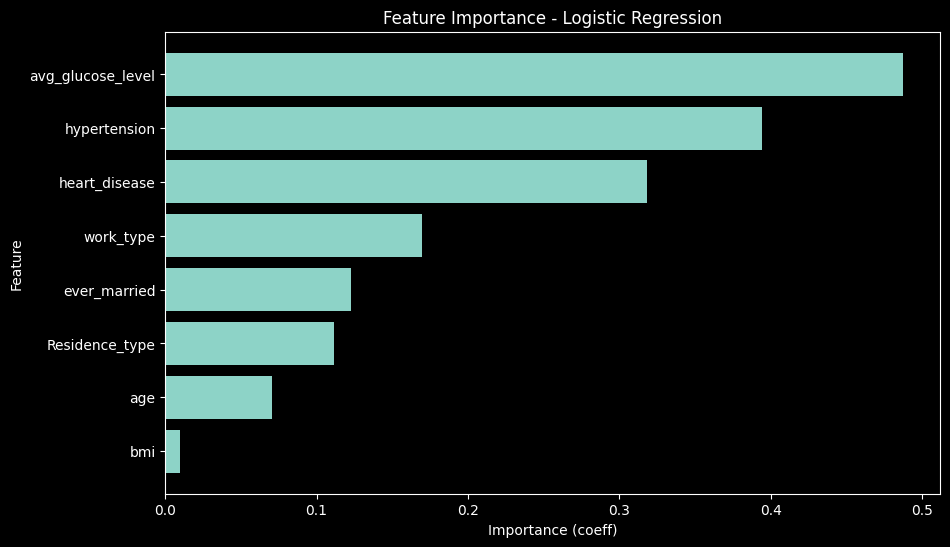

In [ ]:
from sklearn.linear_model import LogisticRegression

base_lr_model = LogisticRegression(random_state=42, max_iter=1000)

model(base_lr_model , 'Logistic Regression')

4. RFECV with SVM

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator wi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



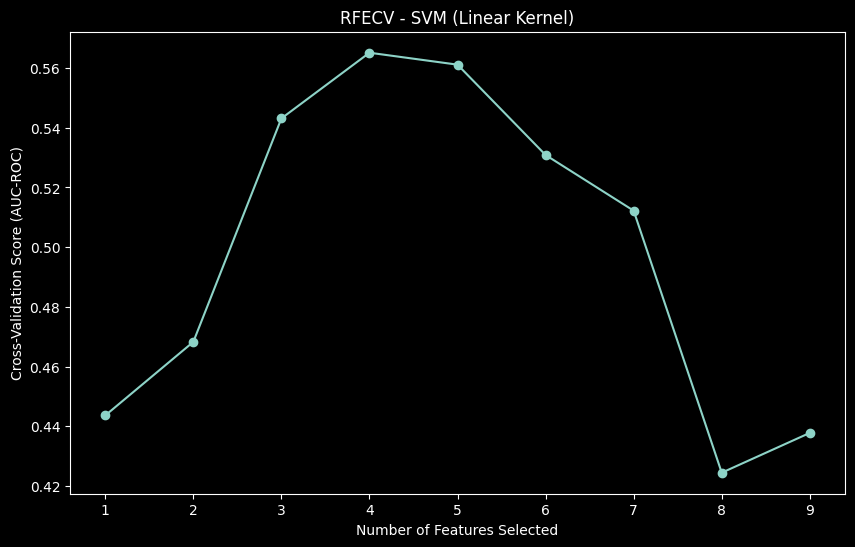

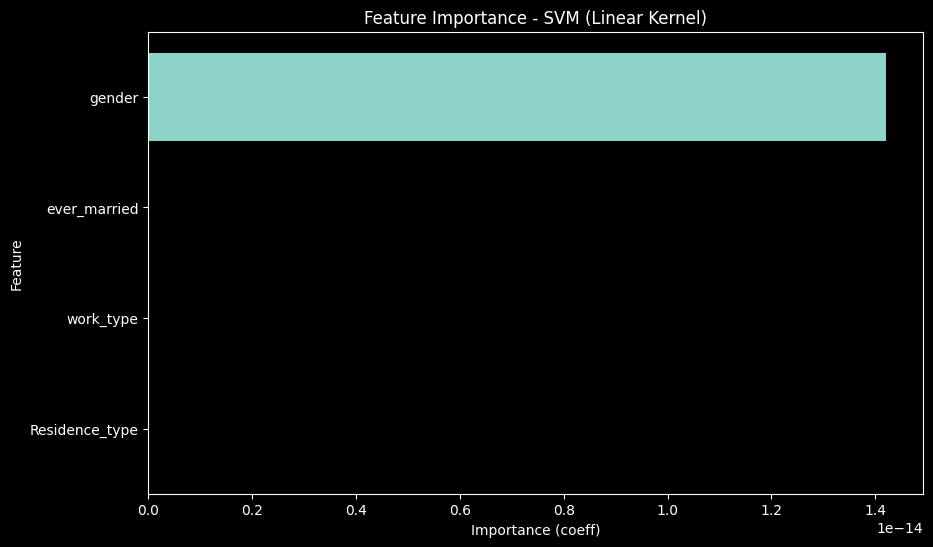

In [ ]:
from sklearn.svm import SVC

base_svm_model = SVC(kernel='linear', probability=True, random_state=42)

model(base_svm_model, 'SVM (Linear Kernel)')

### Result Evaluation & Interpretation (before resampling)

Evaluating Random Forest...
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 fe

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator wi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



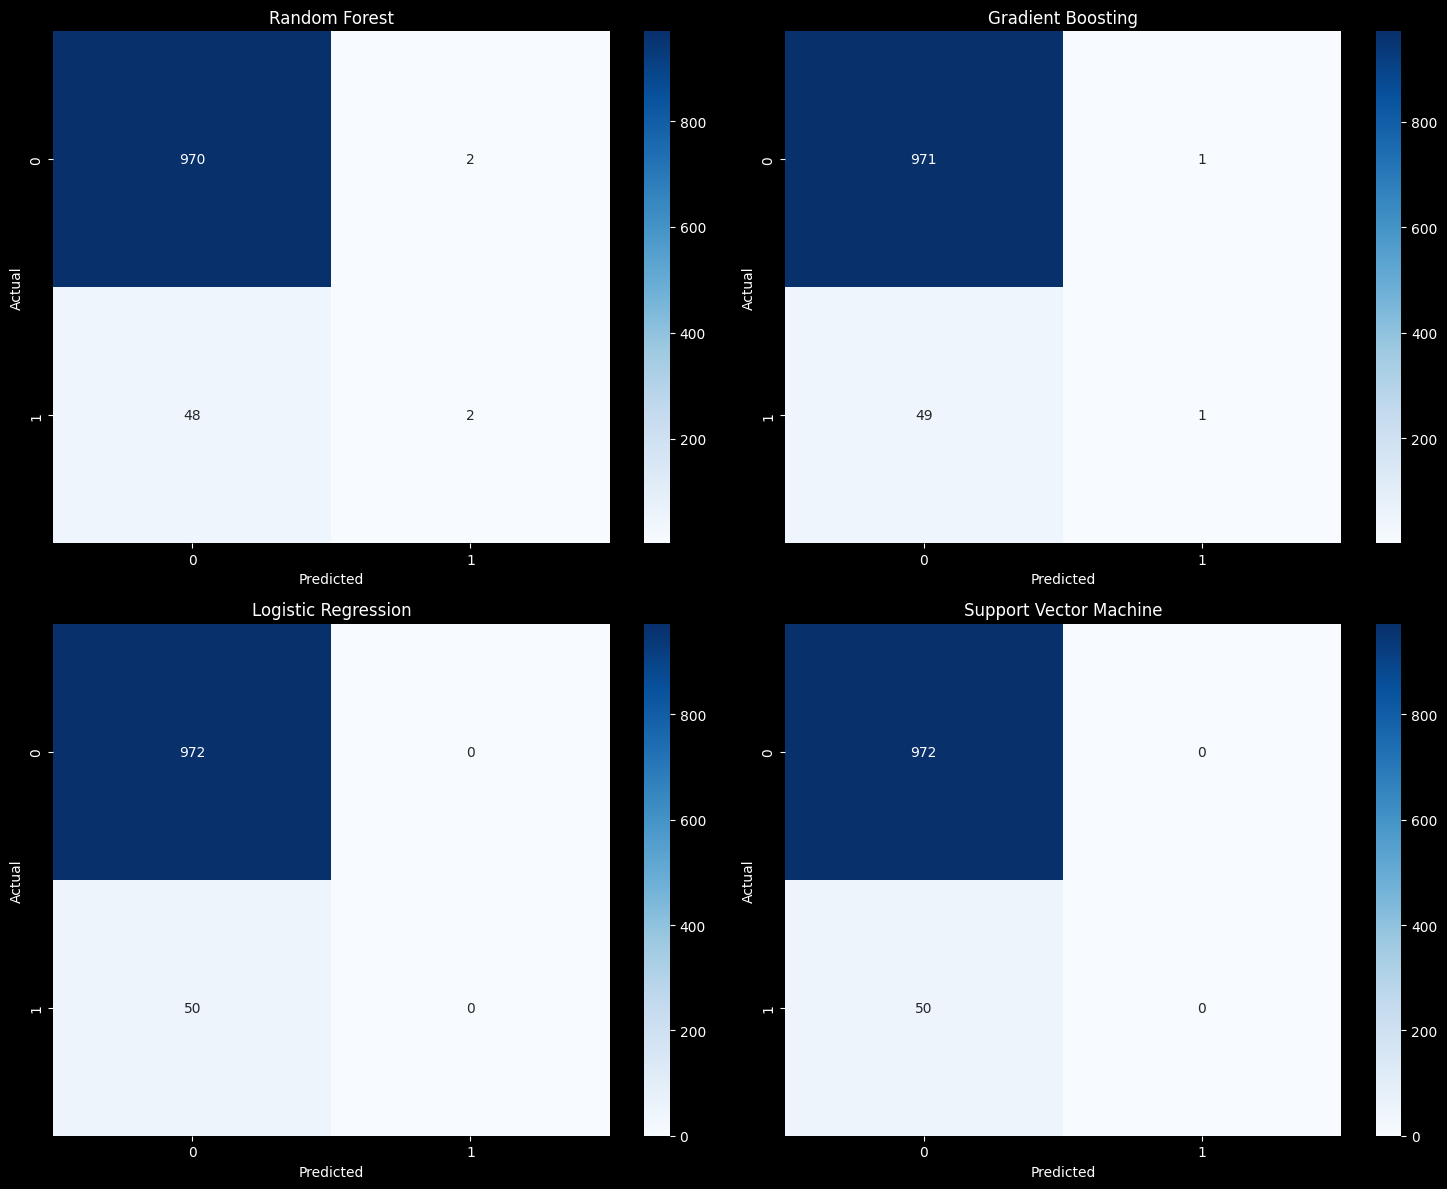

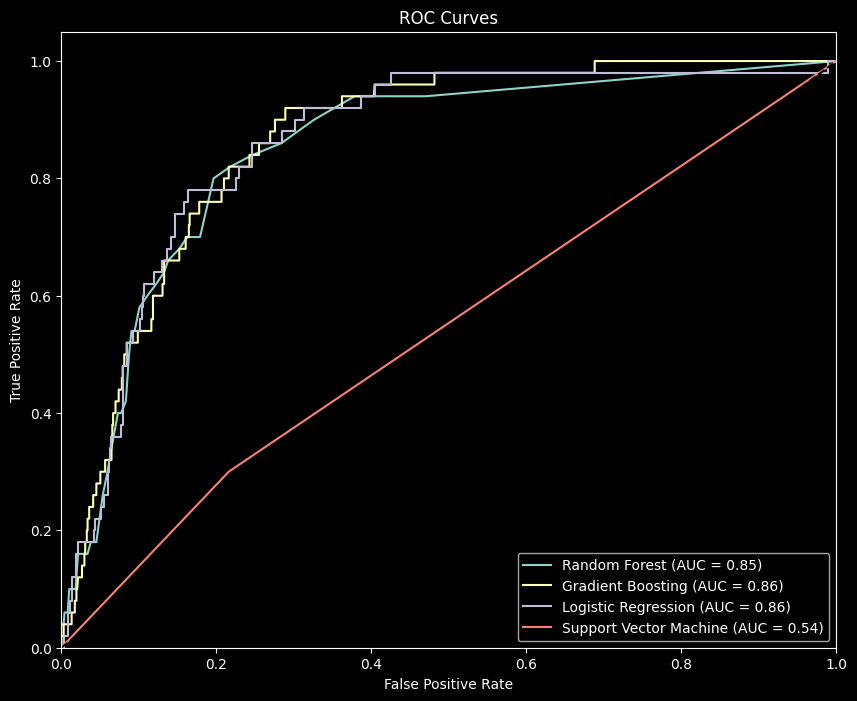

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

# Initialize storage for results
results = []
confusion_matrices = {}
roc_curves = {}

# Function to perform RFECV and model evaluation
def evaluate_with_rfecv(model, name, X_train, y_train, X_test, y_test):
    # StratifiedKFold for RFECV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform RFECV
    rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='roc_auc', verbose=1)
    rfecv.fit(X_train, y_train)

    # Get selected features
    optimal_features = rfecv.support_
    selected_features = X_train.columns[optimal_features]
    print(f"\n{name} - Optimal Features Selected:")
    print(selected_features)

    # Reduce datasets to selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train the model
    model.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = model.predict(X_test_selected)
    y_proba = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_selected)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Store evaluation results
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    })

    # Store confusion matrix
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

    # Store ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr)

    return rfecv, selected_features

# Perform evaluation for each classifier
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    evaluate_with_rfecv(clf, name, X_train, y_train, X_test, y_test)

# Display results
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results_df.loc[results_df['Classifier'] == name, 'AUC'].values[0]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

All classifiers have very high accuracy (approximately 95%). This indicates that they are predicting the majority class effectively but may not be capturing the minority class well. It indicates a possible misleading due to the class imbalance.However, the low precision and recall suggest these models are not identifying the minority class at all. From AUC, we can see Random Forest and Gradient Boosting have relatively good result(around 85%),which shows that the performance on distinguishing between the classes can be improved if optimize the threshold. Whereas SVM only has 54% on AUC which only slightly outperforms the random guessing

##Resampling method for class imbalance: Undersampling  method

The target variable "stroke" is highly imbalanced. This imbalance can lead to models that are biased towards the majority class and fail to learn the minority class well. Therefore, Undersampling method is used to reduce the majority class, thus balancing the class distribution and providing the model with more representative data for both classes

In [ ]:
from sklearn.utils import resample
from collections import Counter

# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['stroke'] == 0]
minority_class = train_data[train_data['stroke'] == 1]

# Perform undersampling on the majority class
majority_class_undersampled = resample(
    majority_class,
    replace=False,
    n_samples=len(minority_class),  # Match the minority class size
    random_state=42
)
# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([majority_class_undersampled, minority_class])

# Separate features and target after undersampling
X_train_undersampled = undersampled_data.drop(columns=['stroke'])
y_train_undersampled = undersampled_data['stroke']

# Check the new class distribution
new_class_distribution = Counter(y_train_undersampled)
print("New class distribution:", new_class_distribution)

New class distribution: Counter({0: 199, 1: 199})


###Result Evaluation & Interpretation (after resampling)

Evaluating Random Forest...
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 fe

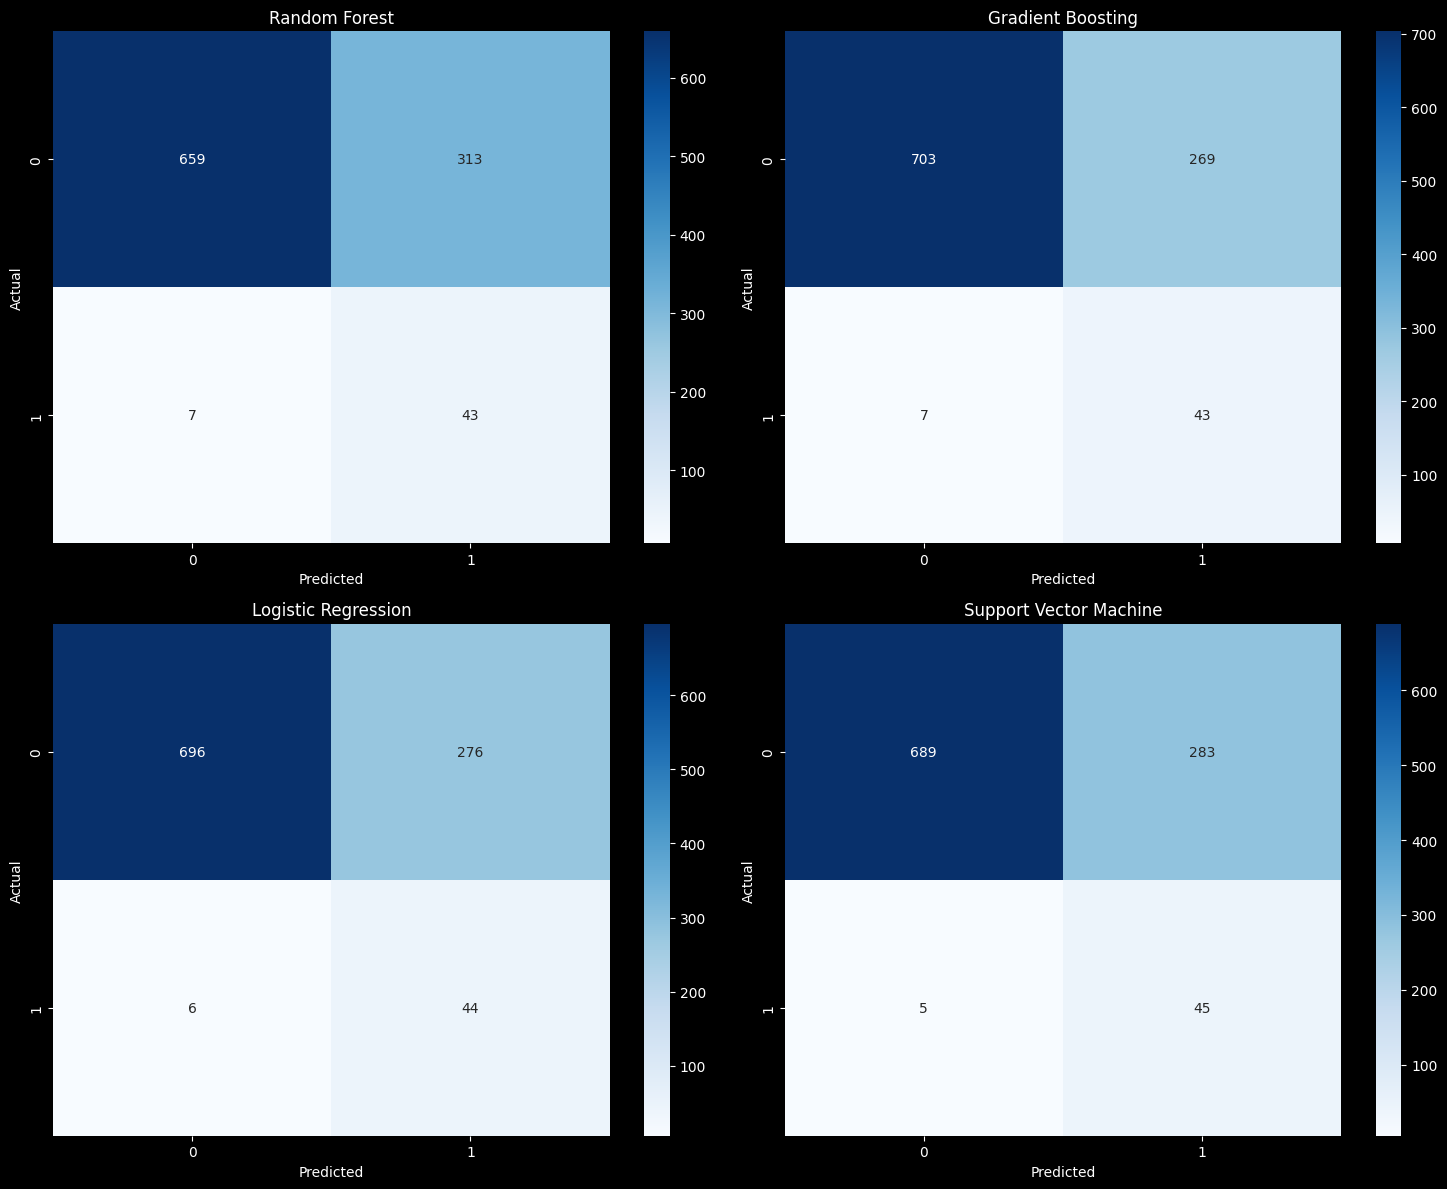

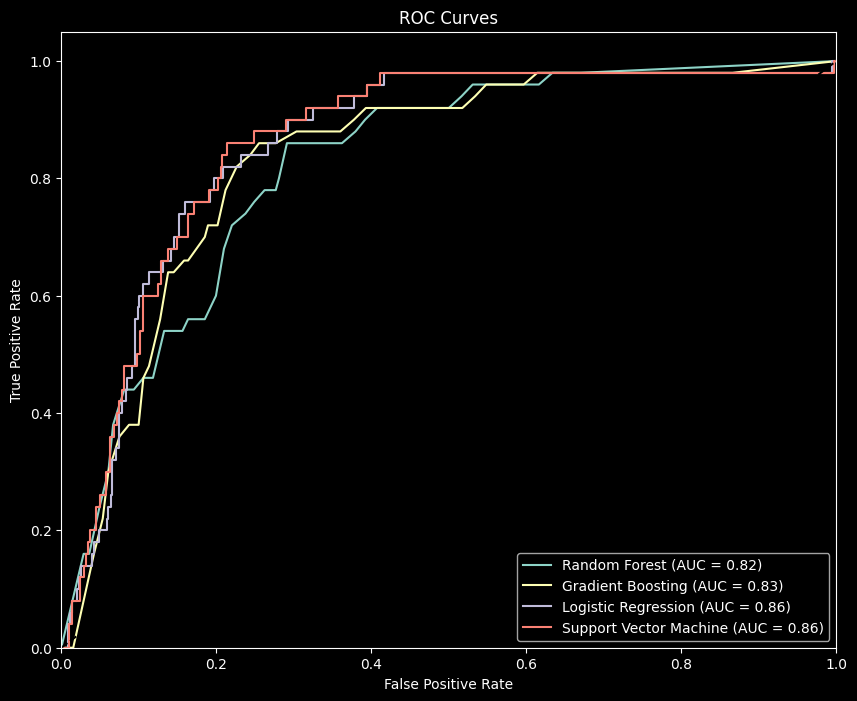

In [ ]:
# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

# Initialize storage for results
results = []
confusion_matrices = {}
roc_curves = {}

# Function to perform RFECV and model evaluation
def evaluate_with_rfecv(model, name, X_train, y_train, X_test, y_test):
    # StratifiedKFold for RFECV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform RFECV
    rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='roc_auc', verbose=1)
    rfecv.fit(X_train, y_train)

    # Get selected features
    optimal_features = rfecv.support_
    selected_features = X_train.columns[optimal_features]
    print(f"\n{name} - Optimal Features Selected:")
    print(selected_features)

    # Reduce datasets to selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train the model
    model.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = model.predict(X_test_selected)
    y_proba = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_selected)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Store evaluation results
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    })

    # Store confusion matrix
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

    # Store ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr)

    return rfecv, selected_features

# Perform evaluation for each classifier using undersampled data
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    evaluate_with_rfecv(clf, name, X_train_undersampled, y_train_undersampled, X_test, y_test)

# Display results
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results_df.loc[results_df['Classifier'] == name, 'AUC'].values[0]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

After undersampling, the metrics indicate notable changes in the performance of the classifiers. All classifiers show a significant improvement in recall, with values ranging between 0.86 and 0.90. This suggests that the models are better at identifying the minority class after undersampling. In healthcare, minimizing false negatives is crucial, as the priority is to avoid missing high-risk cases. False positives are generally more acceptable than false negatives, given the severe consequences of overlooking individuals at risk.

Accuracy has decreased compared to the imbalanced dataset results, ranging between 0.69 and 0.73. This is expected after undersampling because the class distribution is now more balanced, which shifts the focus from majority class accuracy to better handling the minority class.

Precision values are low (around 0.12–0.14), which indicate that a significant proportion of the predicted positives are false positives. This reflects trade-off when improving recall on an imbalanced dataset.

F1-Score are higher than imbalanced dataset but still relatively low (21%-24%).it may due to trade-off between precision and recall.

AUC scores are strong now for all models (0.82–0.86), suggesting good overall model discrimination

The best-performing model is SVM which achieved the highest recall, reaching 0.90, which is crucial in healthcare to minimize false negatives and ensure high-risk cases are identified. It also demonstrated a strong AUC score of 0.86, reflecting its excellent ability to distinguish between the two classes. While the F1-score was modest at 24%, this model achieved the best balance between precision and recall, making it the most effective choice for this imbalanced dataset

The SVM model performed optimally with the following selected features: gender, age, hypertension, ever_married, work_type, Residence_type, avg_glucose_level, and bmi

# 7.0 Deployment

SVM (Support Vector Machine) is the best candidate for deployment, given its:

Highest recall (0.90), which is critical in many imbalanced datasets.

Best AUC (0.8163), suggesting strong overall discriminative ability.

In [ ]:
import pickle

# Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Perform RFECV to select optimal features
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfecv = RFECV(estimator=svm_model, step=1, cv=cv, scoring='roc_auc', verbose=1)
rfecv.fit(X_train_undersampled, y_train_undersampled)

# Get selected features
optimal_features = X_train_undersampled.columns[rfecv.support_]
print(f"Optimal Features Selected: {optimal_features}")

# Reduce datasets to selected features
X_train_selected = X_train_undersampled[optimal_features]
X_test_selected = X_test[optimal_features]

# Train the model with the selected features
svm_model.fit(X_train_selected, y_train_undersampled)

# Now pickle the trained SVM model
with open('svm_model_with_optimal_features.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

print("SVM model with optimal features saved as 'svm_model_with_optimal_features.pkl'.")

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator wi

##Flask App Code

Integrate the trained SVM model into the Flask app using the pickle file. Run the flask app in local machine.

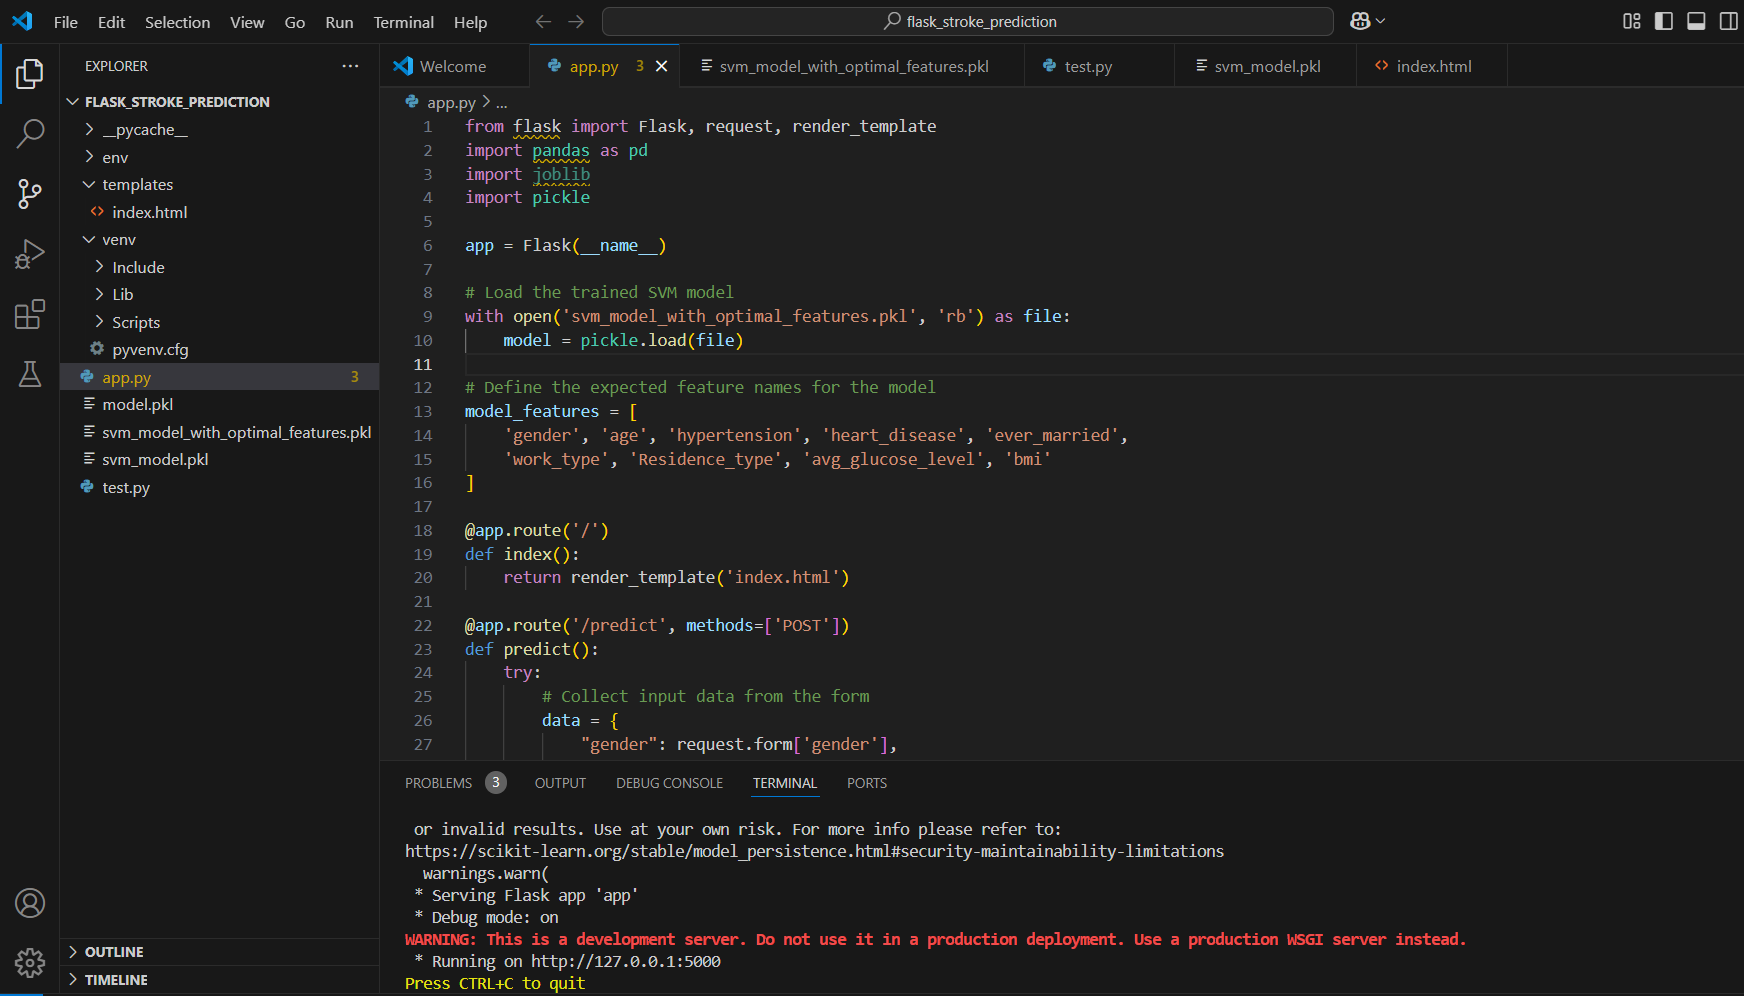

##App interface Picture

Run the http://127.0.0.1:5000/ in the browser.

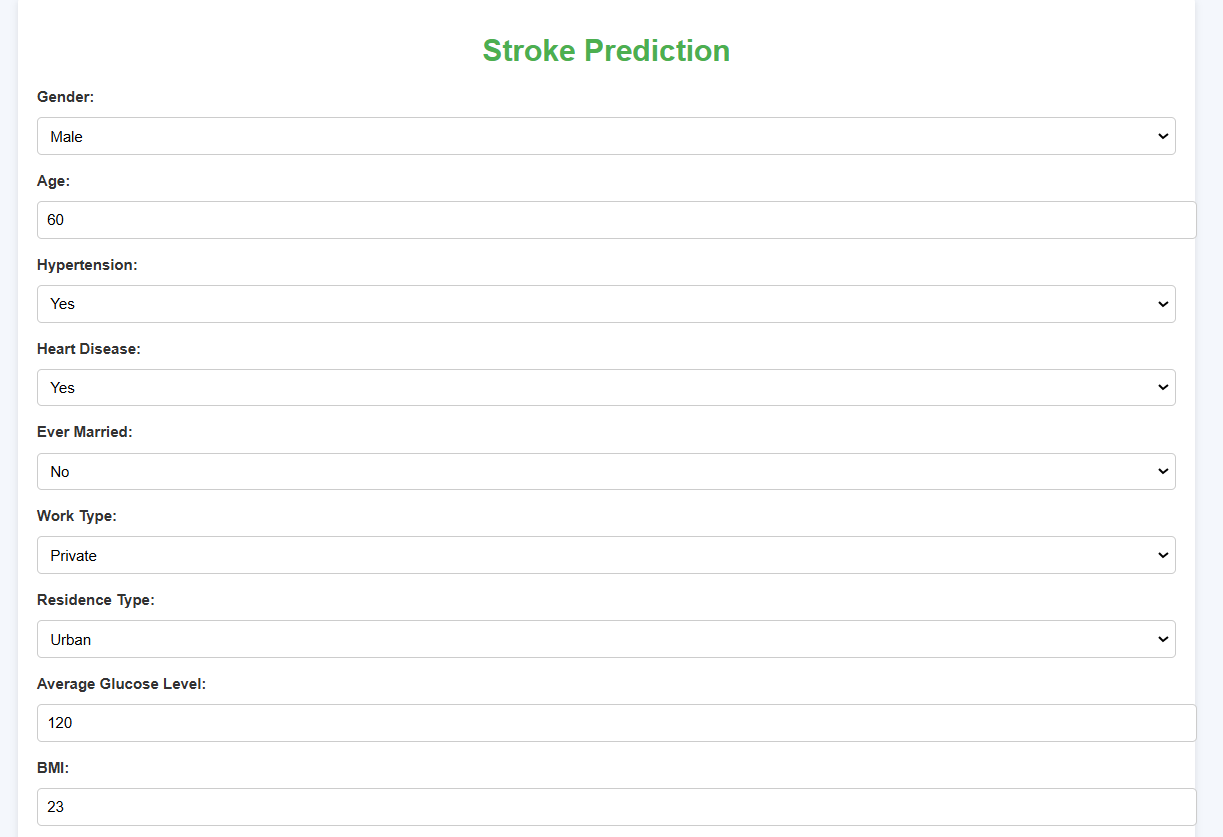

After key in the details, will get the prediction result as below.

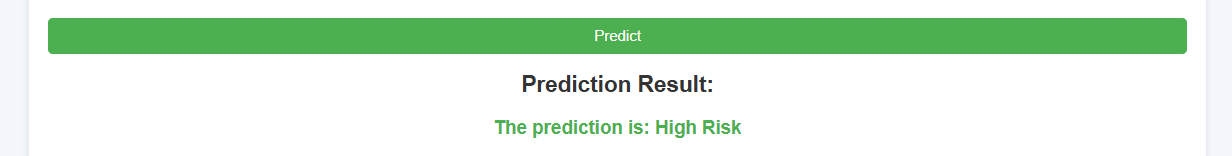

# Reference
1. Sirsat, M. S., Fermée, E., & Câmara, J. (2020). Machine learning for brain stroke: A review. Journal of Stroke and Cerebrovascular Diseases, 29(10), 105162. https://doi.org/10.1016/j.jstrokecerebrovasdis.2020.105162
2. Fernandes, J. N. D., Cardoso, V. E. M., Comesaña-Campos, A., & Pinheira, A. (2024). Comprehensive review: Machine and deep learning in brain stroke diagnosis. Sensors, 24(13), 4355. https://doi.org/10.3390/s24134355
3. Andersson, J., Rejnö, Å., Jakobsson, S., Hansson, P.-O., Nielsen, S. J., & Björck, L.. (2024). Symptoms at stroke onset as described by patients: a qualitative study. BMC Neurology, 24(1). https://doi.org/10.1186/s12883-024-03658-4
4. Mainali, S., Darsie, M. E., & Smetana, K. S.. (2021). Machine Learning in Action: Stroke Diagnosis and Outcome Prediction. Frontiers in Neurology, 12. https://doi.org/10.3389/fneur.2021.734345
5. Chaki, J., & Woźniak, M.. (2024). Deep Learning and Artificial Intelligence in Action (2019–2023): A Review on Brain Stroke Detection, Diagnosis, and Intelligent Post-Stroke Rehabilitation Management. IEEE Access, 12, 52161–52181. https://doi.org/10.1109/access.2024.3383140
6. Wenstrup, J., Havtorn, J. D., Borgholt, L., Blomberg, S. N., Maaloe, L., Sayre, M. R., Christensen, H., Kruuse, C., & Christensen, H. C.. (2023). A retrospective study on machine learning-assisted stroke recognition for medical helpline calls. Npj Digital Medicine, 6(1). https://doi.org/10.1038/s41746-023-00980-y